# Basic Exploratory Data Analysis

https://machinelearningmastery.ru/exploratory-data-analysis-eda-a-practical-guide-and-template-for-structured-data-abfbf3ee3bd9/  ///  с eda(df)  
https://gist.github.com/jiahao87/c97214065f996b76ab8fe4ca1964b2b5  
https://dev-gang.ru/article/polnoe-rukovodstvo-po-issledovatelskomu-analizu-dannyh-85wltgnosc/  
https://waksoft.susu.ru/2021/07/23/issledovatelskij-analiz-dannyh-v-python-rukovodstvo-dlya-novichkov-na-2021-god/  
https://toadmin.ru/как-выполнить-исследовательский-ана/  
https://www.helenkapatsa.ru/razvedochnyy-analiz-dannykh-chast-1/  
https://www.dmitrymakarov.ru/data-analysis/eda-04/  
https://www.kaggle.com/code/emstrakhov/lesson-1-eda-with-pandas

- Предварительный просмотр данных
  - df.sample(5)
- Переименование полей
  - df.columns = df.columns.str.lower().str.replace(' ',  '\_')
- Общее количество записей и типов столбцов
  - df.shape, 
  - df.info()
- Проверить любые нулевые значения
  - df.isnull().sum(), 
  - df.isnull().sum() / df.shape[0]
- Проверить дубликаты записей
  - df[df.duplicated()].shape[0], 
  - df[df.duplicated()].shape[0] / df.shape[0], 
  - df.drop_duplicates(subset=None, keep=’first’, inplace=False)
- Преобразование типов данных
  - время, 
  - категориальные типы данных
- ВременнЫе границы, пропущенные периоды
  - мин, макс,
  - разница (макс - мин) + 1 - количеством имеющихся периодов,
  - барплот "периоды - количество строк"
- График распределения числовых данных
  - одномерное распределение, 
  - парное совместное распределение
- Распределение количества данных категориальных данных
- Анализировать временные ряды числовых данных по дням, месяцам и годам.

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = sns.load_dataset('taxis')

In [3]:
df.sample(5)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
2709,2019-03-31 01:55:50,2019-03-31 02:06:03,1,1.93,9.0,1.58,0.0,14.38,yellow,credit card,East Chelsea,Little Italy/NoLiTa,Manhattan,Manhattan
10,2019-03-16 10:02:25,2019-03-16 10:22:29,1,3.90,17.0,0.00,0.0,17.80,yellow,cash,LaGuardia Airport,Astoria,Queens,Queens
2464,2019-03-31 20:06:01,2019-03-31 20:31:38,1,12.00,34.0,8.00,0.0,43.30,yellow,credit card,JFK Airport,Middle Village,Queens,Queens
4185,2019-03-10 11:11:51,2019-03-10 11:18:23,6,1.06,6.5,0.00,0.0,9.80,yellow,cash,Murray Hill,Gramercy,Manhattan,Manhattan
4532,2019-03-12 23:09:03,2019-03-12 23:42:10,1,16.79,47.5,10.26,0.0,61.56,yellow,credit card,Financial District South,Allerton/Pelham Gardens,Manhattan,Bronx


In [9]:
df.shape

(6433, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

In [6]:
df.isnull().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

In [8]:
df.isnull().sum() / df.shape[0]

pickup             0.000000
dropoff            0.000000
passengers         0.000000
distance           0.000000
fare               0.000000
tip                0.000000
tolls              0.000000
total              0.000000
color              0.000000
payment            0.006840
pickup_zone        0.004042
dropoff_zone       0.006995
pickup_borough     0.004042
dropoff_borough    0.006995
dtype: float64

In [5]:
df[df.duplicated()].shape[0]

0

In [16]:
df[df.duplicated()].shape[0] / df.shape[0]

0.0

In [23]:
dates = df.pickup.dt.date

In [24]:
dates.min()

datetime.date(2019, 2, 28)

In [25]:
dates.max()

datetime.date(2019, 3, 31)

In [55]:
(dates.max() - dates.min()).days + 1 - dates.groupby(by=dates).count().shape[0]

0

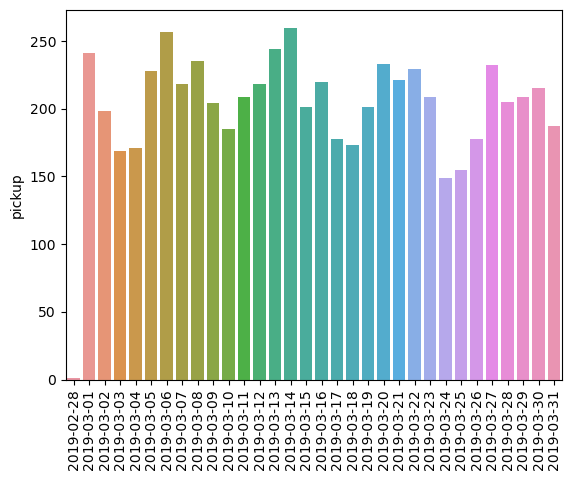

In [38]:
sns.barplot(x=dates.value_counts().sort_index().index, y=dates.value_counts().sort_index())
plt.xticks(rotation=90);

In [15]:
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [ ]:
df.select_dtypes(include=['int', 'float'], exclude=None).columns

Index(['passengers', 'distance', 'fare', 'tip', 'tolls', 'total'], dtype='object')